In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#Linear Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier
# SVM model
from sklearn.svm import SVC



In [2]:
# Load the dataset from the provided file path
file_path = 'Alicia_final_proj_data.xlsm'
df = pd.read_excel(file_path, sheet_name='Alicia-TRAIN', header=1)

# Drop the first column
df = df.iloc[:, 1:]

# Display the first few rows of the dataset
df.head()

,ID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,...,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,Alicia1,Female,0,No,No,63,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),80,4861.0,No
1,Alicia2,Female,0,Yes,No,4,Yes,No,onlyViaER,Maryville,...,Maryville,Maryville,Maryville,Maryville,One year,No,Bank transfer (automatic),21,79.0,No
2,Alicia3,Male,0,No,No,56,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82,4534.0,No
3,Alicia4,Male,0,Yes,Yes,32,Yes,No,Fiber optic,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,95,3132.0,No
4,Alicia5,Male,0,Yes,Yes,72,No,Maryville,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),65,4479.0,No


In [3]:
# Get basic information about the dataset (data types, non-null values, etc.)
df_info = df.info()

# Get summary statistics for numerical columns
df_describe = df.describe()

# Check for missing values in the dataset
missing_values = df.isnull().sum()

df_info, df_describe, missing_values
print("missingvals",missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   object 
 1   gender            1000 non-null   object 
 2   Management        1000 non-null   int64  
 3   USAcitizen        1000 non-null   object 
 4   Married           1000 non-null   object 
 5   MonthsInUnion     1000 non-null   int64  
 6   ContinuingEd      1000 non-null   object 
 7   FeatureA          1000 non-null   object 
 8   Connectivity      1000 non-null   object 
 9   FeatureC          1000 non-null   object 
 10  FeatureD          1000 non-null   object 
 11  FeatureE          1000 non-null   object 
 12  FeatureF          1000 non-null   object 
 13  FeatureG          1000 non-null   object 
 14  FeatureB          1000 non-null   object 
 15  DuesFrequency     1000 non-null   object 
 16  PaperlessBilling  1000 non-null   object 
 

In [4]:
# Handling missing values in the TotalDues column by imputing the mean
df['TotalDues'].fillna(df['TotalDues'].mean(), inplace=True)

# Verify that there are no more missing values
missing_values_after_imputation = df.isnull().sum()

missing_values_after_imputation

ID                  0
gender              0
Management          0
USAcitizen          0
Married             0
MonthsInUnion       0
ContinuingEd        0
FeatureA            0
Connectivity        0
FeatureC            0
FeatureD            0
FeatureE            0
FeatureF            0
FeatureG            0
FeatureB            0
DuesFrequency       0
PaperlessBilling    0
PaymentMethod       0
MonthlyDues         0
TotalDues           0
LeftUnion           0
dtype: int64

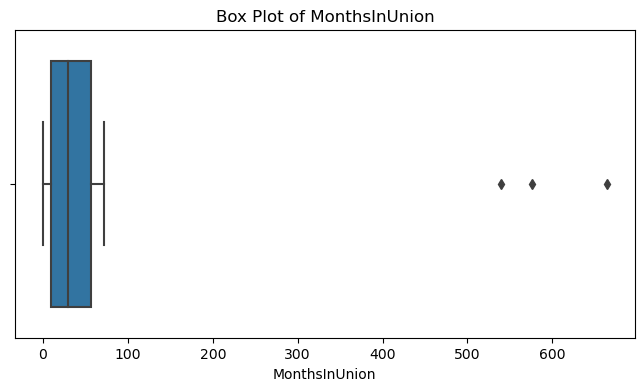

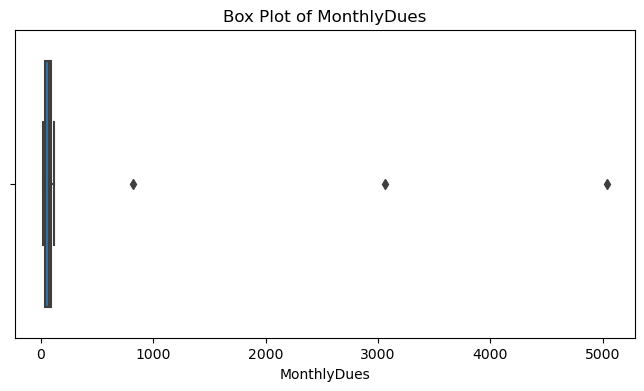

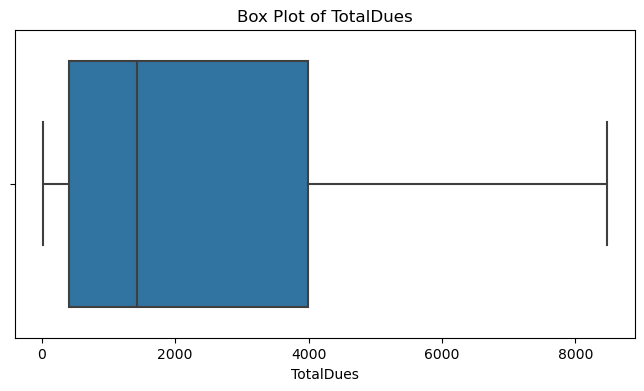

In [5]:
# Define the numerical features for outlier detection
numerical_features = ['MonthsInUnion', 'MonthlyDues', 'TotalDues']

# Create box plots for numerical features to identify outliers
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

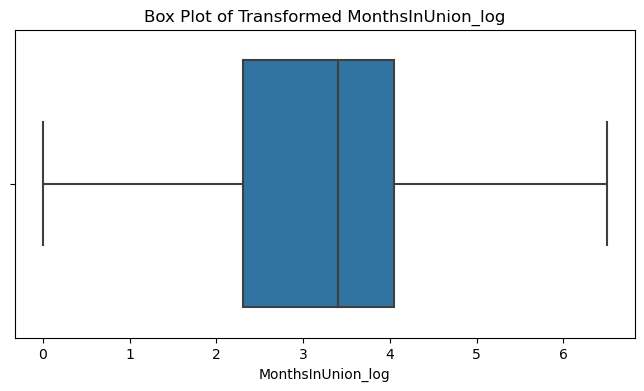

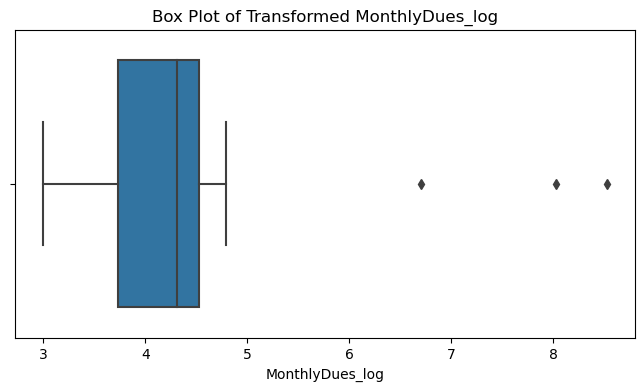

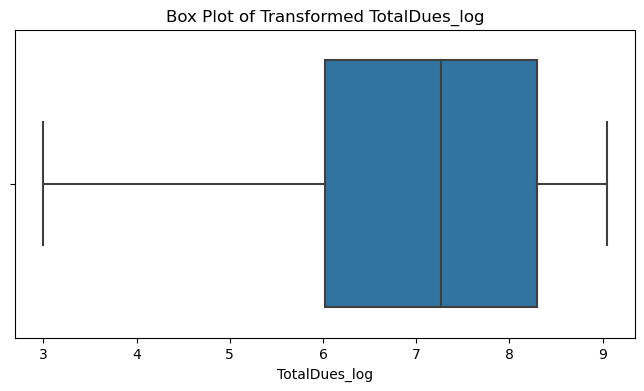

In [6]:
# Apply log transformation to the numerical features with outliers
df['MonthsInUnion_log'] = np.log1p(df['MonthsInUnion'])
df['MonthlyDues_log'] = np.log1p(df['MonthlyDues'])
df['TotalDues_log'] = np.log1p(df['TotalDues'])

# Visualize the transformed features to check the effect of the transformationb
for feature in ['MonthsInUnion_log', 'MonthlyDues_log', 'TotalDues_log']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of Transformed {feature}')
    plt.show()


- After the log transformation has been applied to the numerical features, the box plots for the transformed features show that the effect of the outliers has been reduced significantly.

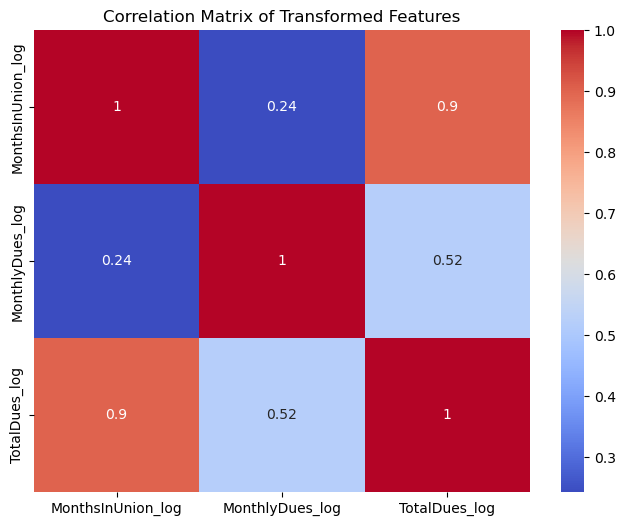

In [7]:
# Calculate the correlation matrix for the transformed numerical features
correlation_matrix = df[['MonthsInUnion_log', 'MonthlyDues_log', 'TotalDues_log']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Transformed Features')
plt.show()

- The correlations between MonthsInUnion_log, MonthlyDues_log, and TotalDues_log appear to be relatively low, indicating that there isn't significant collinearity among these features.

In [8]:
# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df, columns=[
    'gender', 'USAcitizen', 'Married', 'ContinuingEd', 
    'FeatureA', 'Connectivity', 'FeatureC', 'FeatureD', 
    'FeatureE', 'FeatureF', 'FeatureG', 'FeatureB', 
    'DuesFrequency', 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

# Drop irrelevant columns and the original untransformed features
df_final = df_encoded.drop(columns=['ID', 'MonthsInUnion', 'MonthlyDues', 'TotalDues'])

# Display the first few rows of the final dataset to verify
df_final.head()

,Management,LeftUnion,MonthsInUnion_log,MonthlyDues_log,TotalDues_log,gender_Male,USAcitizen_Yes,Married_Yes,ContinuingEd_Yes,FeatureA_No,...,FeatureG_No,FeatureG_Yes,FeatureB_No,FeatureB_Yes,DuesFrequency_One year,DuesFrequency_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,No,4.158883,4.394449,8.489205,0,0,0,1,0,...,0,1,1,0,0,1,1,1,0,0
1,0,No,1.609438,3.091042,4.382027,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2,0,No,4.043051,4.418841,8.419580,1,0,0,1,1,...,0,1,0,1,0,1,1,1,0,0
3,0,No,3.496508,4.564348,8.049746,1,1,1,1,1,...,1,0,0,1,1,0,0,0,0,1
4,0,No,4.290459,4.189655,8.407378,1,1,1,0,0,...,0,1,0,1,0,1,1,1,0,0


In [9]:
# Define the feature set (X) and the target variable (y)
X = df_final.drop(columns=['LeftUnion'])
y = df_final['LeftUnion'].apply(lambda x: 1 if x == 'Yes' else 0)  # Encode target as 1 for 'Yes' and 0 for 'No'

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets to verify
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 31), (200, 31), (800,), (200,))

### Logistic Regression

The Logistic Regression model (used as a substitute for Linear Regression in classification tasks) produced the following results on the test set:

- Accuracy: 80.16%
- Precision: 66.35% (for predicting members who left the union)
- Recall: 54.71% (for predicting members who left the union)
- ROC-AUC: 72.18%
- Classification Report:
    - Class 0 (Still in Union): Precision = 84%, Recall = 90%
    - Class 1 (Left Union): Precision = 66%, Recall = 55%
    
The model has a good accuracy, but it shows a lower recall for predicting members who left the union, meaning it does miss some of the true positives.

In [10]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

# Generate a classification report
classification_report_lr = classification_report(y_test, y_pred_lr)

print(f" Accuracy: {np.round(accuracy_lr*100,2)}%\n", 
      f"Precision: {np.round(precision_lr*100,2)}%\n",
      f"Recall: {np.round(recall_lr*100,2)}%\n",
      f"ROC-AUC: {np.round(roc_auc_lr*100,2)}%\n",)
print(" Classification Report: \n")
print(classification_report_lr)

 Accuracy: 80.5%
 Precision: 53.85%
 Recall: 50.0%
 ROC-AUC: 69.3%

 Classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       158
           1       0.54      0.50      0.52        42

    accuracy                           0.81       200
   macro avg       0.70      0.69      0.70       200
weighted avg       0.80      0.81      0.80       200



### Decision Tree vs. Random Forest

In [29]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Model Performance:")
print("Test Accuracy:", accuracy_dt)
print("Test Precision:", precision_dt)
print("Test Recall:", recall_dt)
print("Test ROC-AUC:", roc_auc_dt)
print("\nClassification Report:\n", classification_report_dt)

Decision Tree Model Performance:
Test Accuracy: 0.72
Test Precision: 0.390625
Test Recall: 0.5952380952380952
Test ROC-AUC: 0.6742013261000603

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81       158
           1       0.39      0.60      0.47        42

    accuracy                           0.72       200
   macro avg       0.63      0.67      0.64       200
weighted avg       0.77      0.72      0.74       200



In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model
dt_model_1 = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV with cross-validation
grid_search_dt = GridSearchCV(dt_model_1, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model using grid search
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

# Predict on the test set using the best model
best_dt_model = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluate the tuned model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
precision_best_dt = precision_score(y_test, y_pred_best_dt)
recall_best_dt = recall_score(y_test, y_pred_best_dt)
roc_auc_best_dt = roc_auc_score(y_test, y_pred_best_dt)
classification_report_best_dt = classification_report(y_test, y_pred_best_dt)

print("Best Parameters:", best_params_dt)
print("Best Cross-Validation Score:", best_score_dt)
print("Test Accuracy:", accuracy_best_dt)
print("Test Precision:", precision_best_dt)
print("Test Recall:", recall_best_dt)
print("Test ROC-AUC:", roc_auc_best_dt)
print("\nClassification Report:\n", classification_report_best_dt)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-Validation Score: 0.77125
Test Accuracy: 0.795
Test Precision: 0.5135135135135135
Test Recall: 0.4523809523809524
Test ROC-AUC: 0.6692284508740205

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       158
           1       0.51      0.45      0.48        42

    accuracy                           0.80       200
   macro avg       0.69      0.67      0.68       200
weighted avg       0.79      0.80      0.79       200



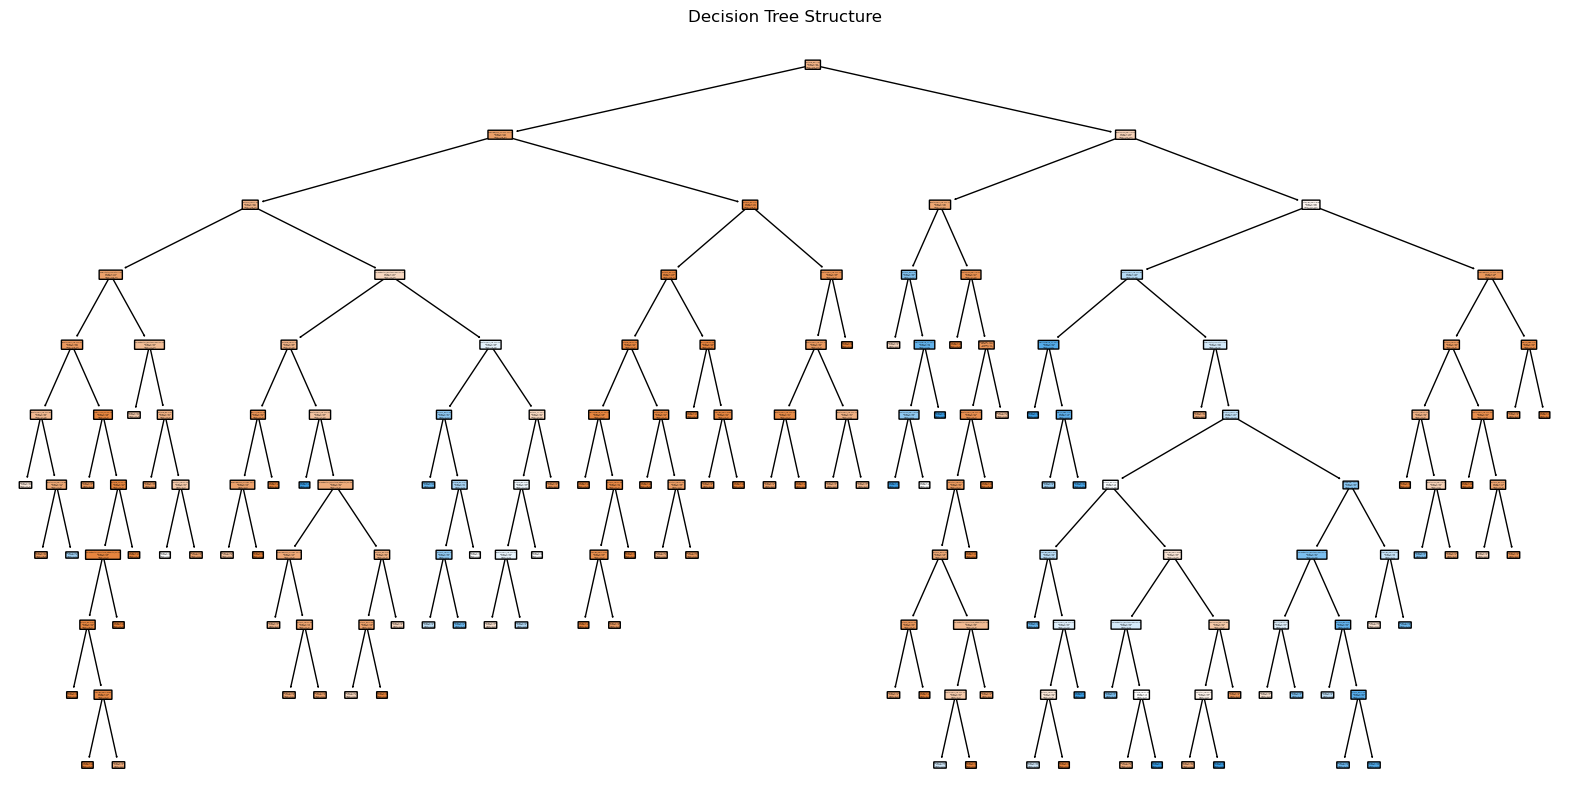

In [13]:
from sklearn.tree import plot_tree
#might remove this. can't see the branches very well.
# Visualize the decision tree structure
plt.figure(figsize=(20, 10))  # Adjust the size of the plot to fit the tree
plot_tree(best_dt_model, feature_names=X.columns, class_names=['Stay', 'Leave'], filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print("Test Accuracy:", accuracy_rf)
print("Test Precision:", precision_rf)
print("Test Recall:", recall_rf)
print("Test ROC-AUC:", roc_auc_rf)
print("\nClassification Report:\n", classification_report_rf)

Random Forest Model Performance:
Test Accuracy: 0.795
Test Precision: 0.5116279069767442
Test Recall: 0.5238095238095238
Test ROC-AUC: 0.6954490657022302

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       158
           1       0.51      0.52      0.52        42

    accuracy                           0.80       200
   macro avg       0.69      0.70      0.69       200
weighted avg       0.80      0.80      0.80       200



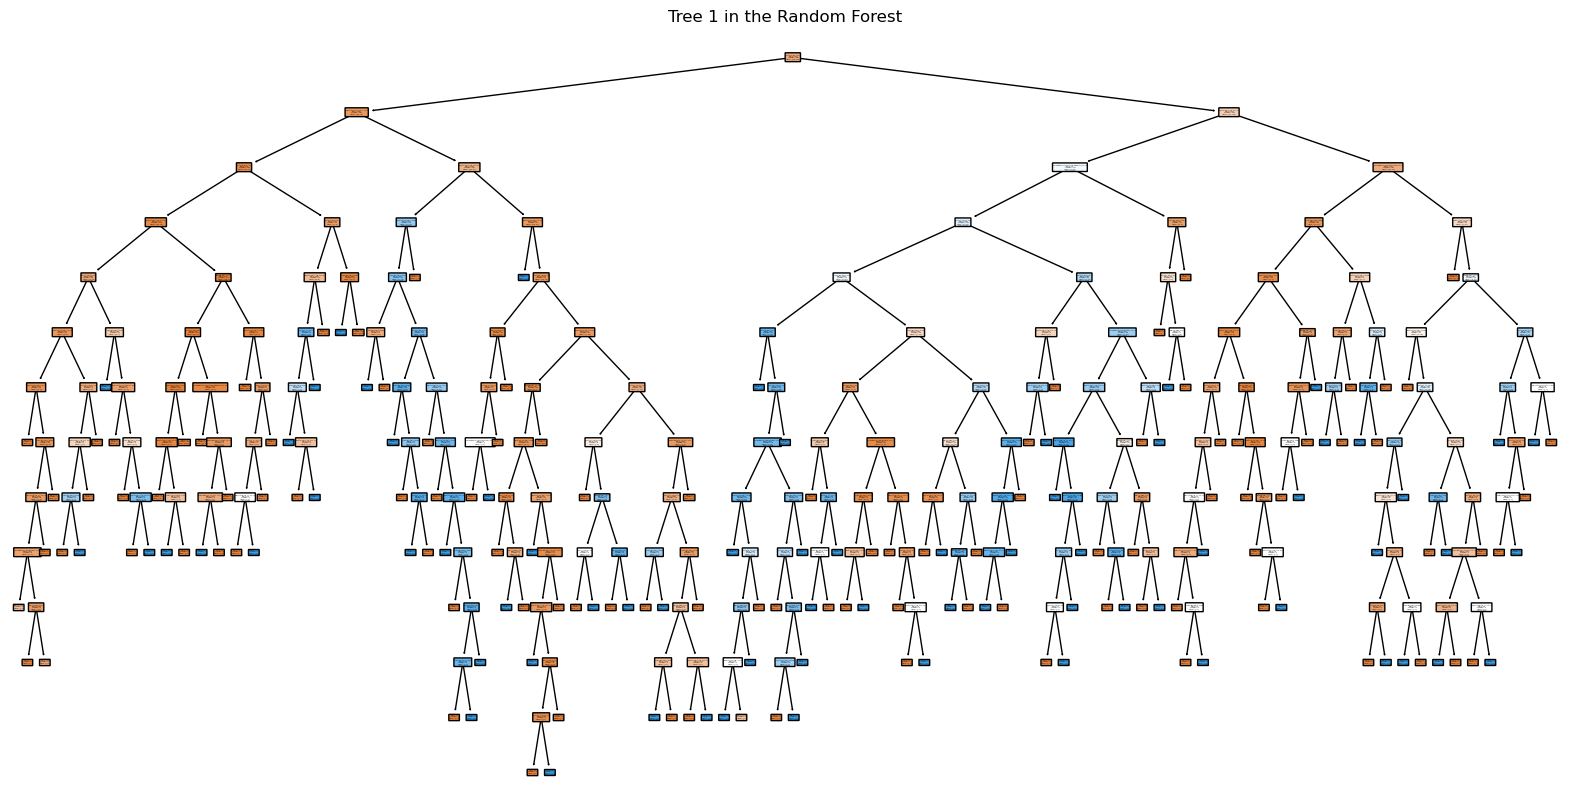

In [15]:
# Select a tree from the Random Forest
tree_index = 0  # You can change this to visualize different trees

# Extract the tree from the Random Forest
single_tree = rf_model.estimators_[tree_index]

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X.columns, class_names=['Stay', 'Leave'], filled=True, rounded=True)
plt.title(f"Tree {tree_index + 1} in the Random Forest")
plt.show()

In [16]:
# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1, probability=True, random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

print("SVM Model Performance:")
print("Test Accuracy:", accuracy_svm)
print("Test Precision:", precision_svm)
print("Test Recall:", recall_svm)
print("Test ROC-AUC:", roc_auc_svm)
print("\nClassification Report:\n", classification_report_svm)

SVM Model Performance:
Test Accuracy: 0.815
Test Precision: 0.5806451612903226
Test Recall: 0.42857142857142855
Test ROC-AUC: 0.6731464737793852

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       158
           1       0.58      0.43      0.49        42

    accuracy                           0.81       200
   macro avg       0.72      0.67      0.69       200
weighted avg       0.80      0.81      0.80       200



In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.5)
        self.output = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.sigmoid(self.output(x))
        return x

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model = SimpleNN(input_size)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_nn = model(X_test_tensor).numpy()
    y_pred_nn_classes = (y_pred_nn > 0.5).astype(int)

# Convert predictions to a format that can be evaluated
accuracy_nn = accuracy_score(y_test, y_pred_nn_classes)
precision_nn = precision_score(y_test, y_pred_nn_classes)
recall_nn = recall_score(y_test, y_pred_nn_classes)
roc_auc_nn = roc_auc_score(y_test, y_pred_nn)
classification_report_nn = classification_report(y_test, y_pred_nn_classes)

print("Neural Network Model Performance (PyTorch):")
print("Test Accuracy:", accuracy_nn)
print("Test Precision:", precision_nn)
print("Test Recall:", recall_nn)
print("Test ROC-AUC:", roc_auc_nn)
print("\nClassification Report:\n", classification_report_nn)


Epoch [10/50], Loss: 0.5971
Epoch [20/50], Loss: 0.5795
Epoch [30/50], Loss: 0.5525
Epoch [40/50], Loss: 0.5276
Epoch [50/50], Loss: 0.5021
Neural Network Model Performance (PyTorch):
Test Accuracy: 0.83
Test Precision: 0.6666666666666666
Test Recall: 0.38095238095238093
Test ROC-AUC: 0.8910488245931283

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       158
           1       0.67      0.38      0.48        42

    accuracy                           0.83       200
   macro avg       0.76      0.67      0.69       200
weighted avg       0.81      0.83      0.81       200



In [18]:

class ImprovedNN(nn.Module):
    def __init__(self, input_size):
        super(ImprovedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Increase neurons
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.3)  # Adjust dropout rate
        self.relu = nn.ReLU()  # Use ReLU activation
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.output(x))
        return x

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model = ImprovedNN(input_size)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100  # Increase epochs
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_nn = model(X_test_tensor).numpy()
    y_pred_nn_classes = (y_pred_nn > 0.5).astype(int)

# Convert predictions to a format that can be evaluated
accuracy_nn = accuracy_score(y_test, y_pred_nn_classes)
precision_nn = precision_score(y_test, y_pred_nn_classes)
recall_nn = recall_score(y_test, y_pred_nn_classes)
roc_auc_nn = roc_auc_score(y_test, y_pred_nn)
classification_report_nn = classification_report(y_test, y_pred_nn_classes)

print("Improved Neural Network Model Performance (PyTorch):")
print("Test Accuracy:", accuracy_nn)
print("Test Precision:", precision_nn)
print("Test Recall:", recall_nn)
print("Test ROC-AUC:", roc_auc_nn)
print("\nClassification Report:\n", classification_report_nn)

Epoch [10/100], Loss: 0.5804
Epoch [20/100], Loss: 0.5548
Epoch [30/100], Loss: 0.5079
Epoch [40/100], Loss: 0.4806
Epoch [50/100], Loss: 0.4498
Epoch [60/100], Loss: 0.4425
Epoch [70/100], Loss: 0.4407
Epoch [80/100], Loss: 0.4376
Epoch [90/100], Loss: 0.4304
Epoch [100/100], Loss: 0.4292
Improved Neural Network Model Performance (PyTorch):
Test Accuracy: 0.805
Test Precision: 0.5294117647058824
Test Recall: 0.6428571428571429
Test ROC-AUC: 0.8663351416515974

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       158
           1       0.53      0.64      0.58        42

    accuracy                           0.81       200
   macro avg       0.71      0.75      0.73       200
weighted avg       0.82      0.81      0.81       200



In [19]:

# Create a dictionary with the metrics for each model
comparison_dict = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Neural Network'],
    'Accuracy': [accuracy_lr, accuracy_best_dt, accuracy_rf, accuracy_svm, accuracy_nn],
    'Precision': [precision_lr, precision_best_dt, precision_rf, precision_svm, precision_nn],
    'Recall': [recall_lr, recall_best_dt, recall_rf, recall_svm, recall_nn],
    'F1-Score': [
        2 * (precision_lr * recall_lr) / (precision_lr + recall_lr),
        2 * (precision_best_dt * recall_best_dt) / (precision_best_dt + recall_best_dt),
        2 * (precision_rf * recall_rf) / (precision_rf + recall_rf),
        2 * (precision_svm * recall_svm) / (precision_svm + recall_svm),
        2 * (precision_nn * recall_nn) / (precision_nn + recall_nn)
    ],
    'ROC-AUC': [roc_auc_lr, roc_auc_best_dt, roc_auc_rf, roc_auc_svm, roc_auc_nn]
}

# Convert the dictionary into a DataFrame
comparison_df = pd.DataFrame(comparison_dict)

# Display the comparison table
print(comparison_df)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression     0.805   0.538462  0.500000  0.518519  0.693038
1        Decision Tree     0.795   0.513514  0.452381  0.481013  0.669228
2        Random Forest     0.795   0.511628  0.523810  0.517647  0.695449
3                  SVM     0.815   0.580645  0.428571  0.493151  0.673146
4       Neural Network     0.805   0.529412  0.642857  0.580645  0.866335


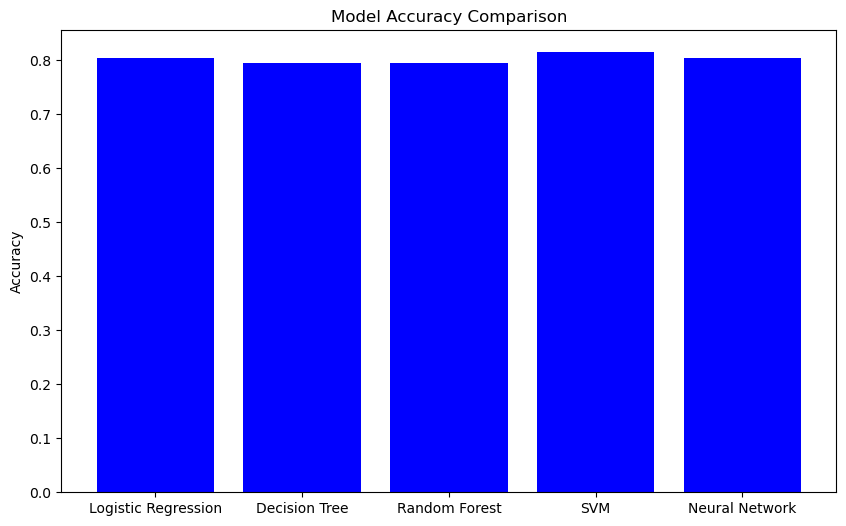

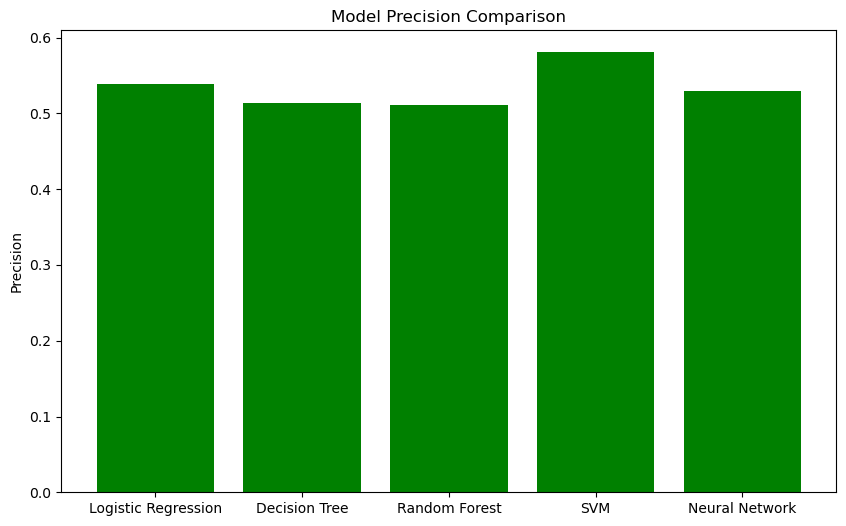

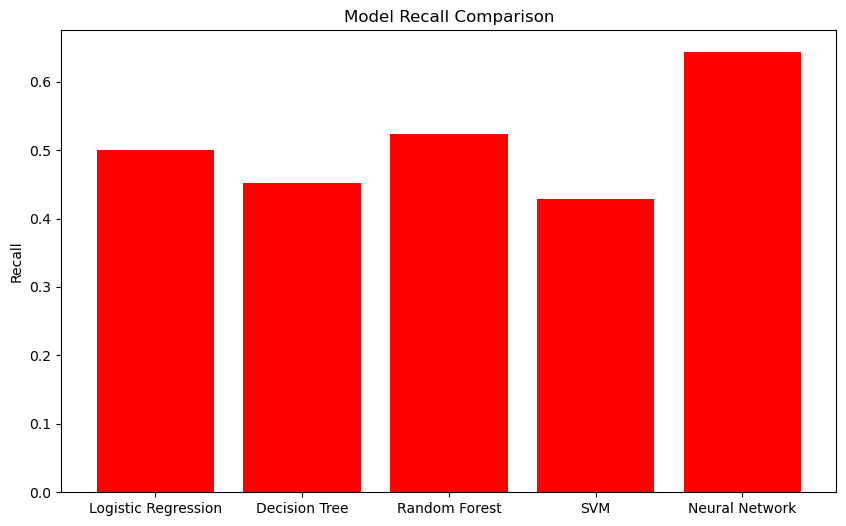

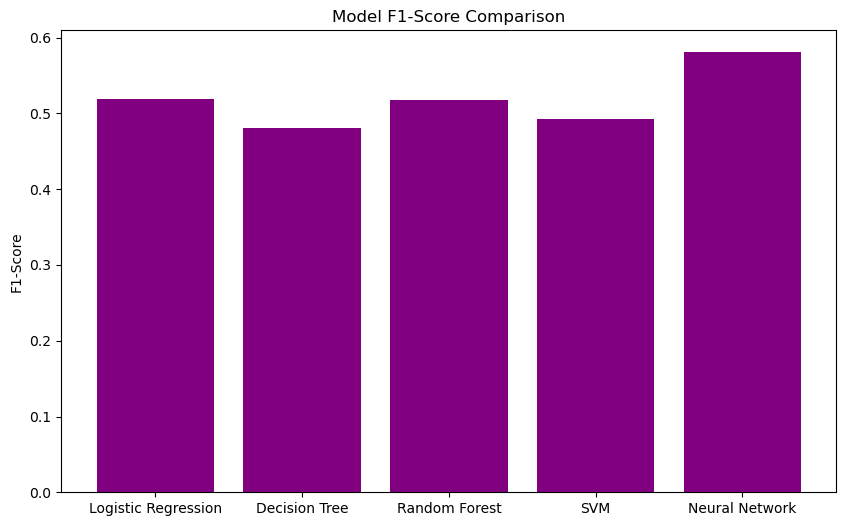

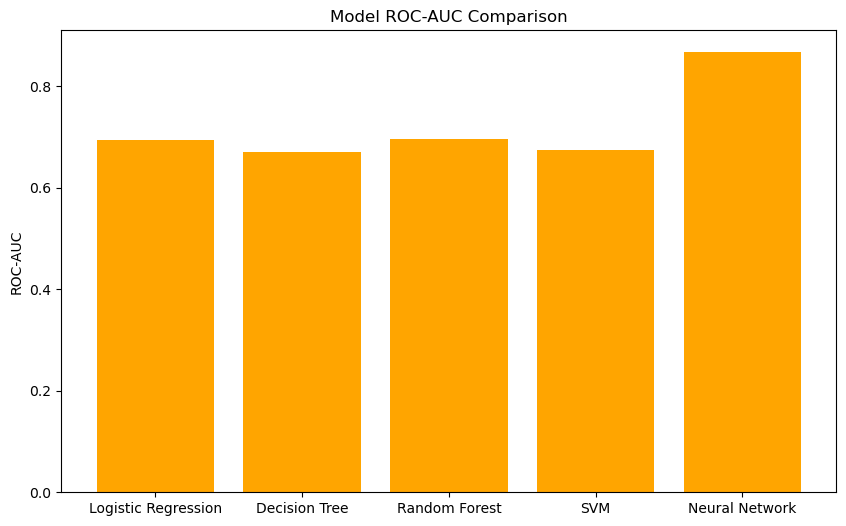

In [20]:


# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color='blue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Plot Precision Comparison
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['Precision'], color='green')
plt.title('Model Precision Comparison')
plt.ylabel('Precision')
plt.show()

# Plot Recall Comparison
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['Recall'], color='red')
plt.title('Model Recall Comparison')
plt.ylabel('Recall')
plt.show()

# Plot F1-Score Comparison
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['F1-Score'], color='purple')
plt.title('Model F1-Score Comparison')
plt.ylabel('F1-Score')
plt.show()

# Plot ROC-AUC Comparison
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['ROC-AUC'], color='orange')
plt.title('Model ROC-AUC Comparison')
plt.ylabel('ROC-AUC')
plt.show()


## Testing the Models with Unseen Data
### Step 1: Regulating the Dataset

In [21]:
df_test = pd.read_excel(file_path, sheet_name='Alicia-TEST', header=1)
df_test = df_test.iloc[:, 1:]  # Drop the first column if necessary
df_test.head()

,ID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues
0,Alicia1,Male,0,No,No,58,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,105,6220
1,Alicia2,Female,0,Yes,Yes,46,Yes,No,Dial-in,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,Two year,No,Bank transfer (automatic),20,890
2,Alicia3,Female,0,No,No,2,Yes,No,onlyViaER,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,Month-to-month,No,Credit card (automatic),20,35
3,Alicia4,Female,0,Yes,Yes,22,Yes,No,onlyViaER,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,Month-to-month,No,Bank transfer (automatic),19,454
4,Alicia5,Female,0,Yes,Yes,58,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,Two year,No,Mailed check,76,4416


In [22]:
# Get basic information about the dataset (data types, non-null values, etc.)
df_test_info = df_test.info()

# Get summary statistics for numerical columns
df_test_describe = df_test.describe()

# Check for missing values in the dataset
df_test_missing_values = df_test.isnull().sum()

df_test_info, df_test_describe, df_test_missing_values
print("missingvals",df_test_missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   object
 1   gender            1000 non-null   object
 2   Management        1000 non-null   int64 
 3   USAcitizen        1000 non-null   object
 4   Married           1000 non-null   object
 5   MonthsInUnion     1000 non-null   int64 
 6   ContinuingEd      1000 non-null   object
 7   FeatureA          1000 non-null   object
 8   Connectivity      1000 non-null   object
 9   FeatureC          1000 non-null   object
 10  FeatureD          1000 non-null   object
 11  FeatureE          1000 non-null   object
 12  FeatureF          1000 non-null   object
 13  FeatureG          1000 non-null   object
 14  FeatureB          1000 non-null   object
 15  DuesFrequency     1000 non-null   object
 16  PaperlessBilling  1000 non-null   object
 17  PaymentMethod  

In [23]:
# Handling missing values in the TotalDues column by imputing the mean
df_test['TotalDues'].fillna(df_test['TotalDues'].mean(), inplace=True)

# Verify that there are no more missing values
missing_values_after_imputation = df_test.isnull().sum()

missing_values_after_imputation

ID                  0
gender              0
Management          0
USAcitizen          0
Married             0
MonthsInUnion       0
ContinuingEd        0
FeatureA            0
Connectivity        0
FeatureC            0
FeatureD            0
FeatureE            0
FeatureF            0
FeatureG            0
FeatureB            0
DuesFrequency       0
PaperlessBilling    0
PaymentMethod       0
MonthlyDues         0
TotalDues           0
dtype: int64

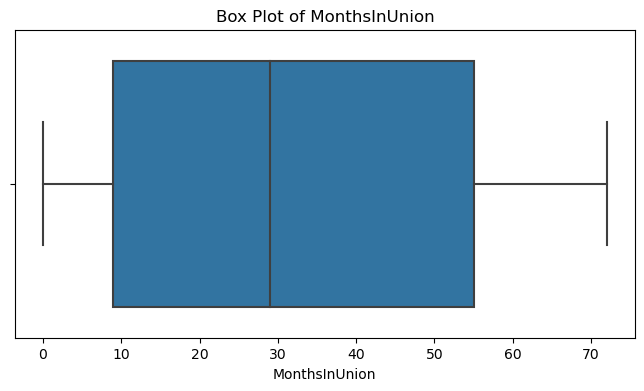

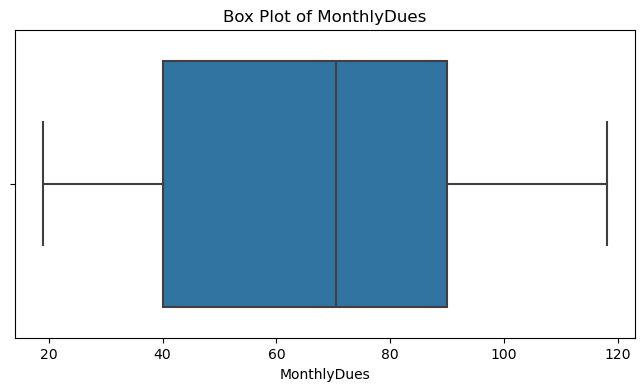

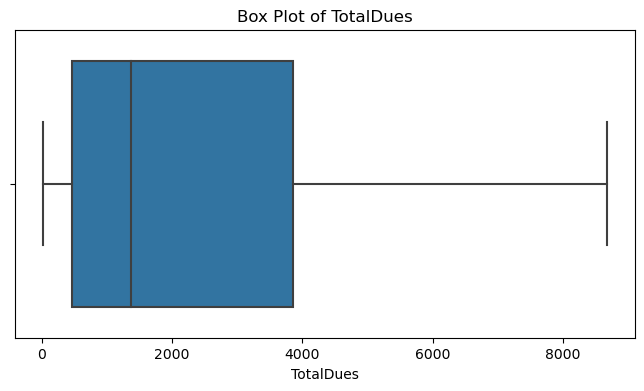

In [24]:
# Define the numerical features for outlier detection
numerical_features_df_test = ['MonthsInUnion', 'MonthlyDues', 'TotalDues']

# Create box plots for numerical features to identify outliers
for feature in numerical_features_df_test:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_test[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

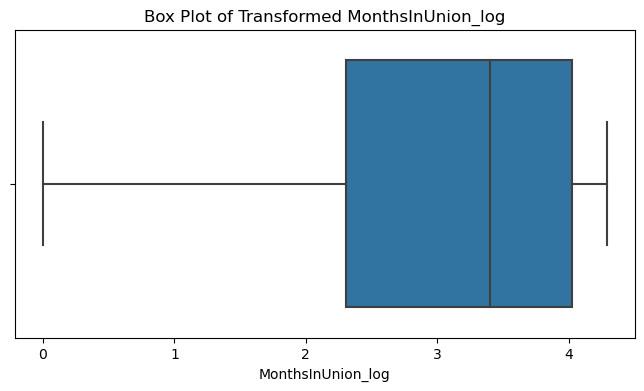

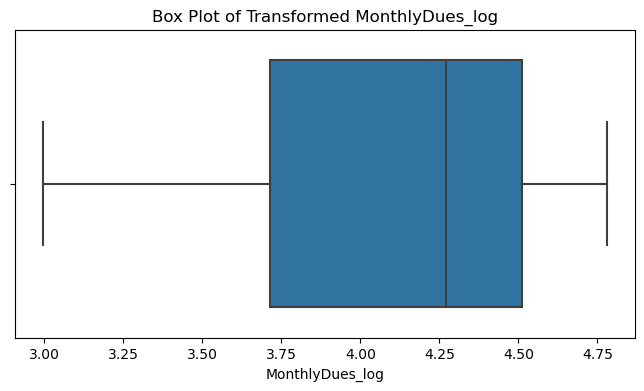

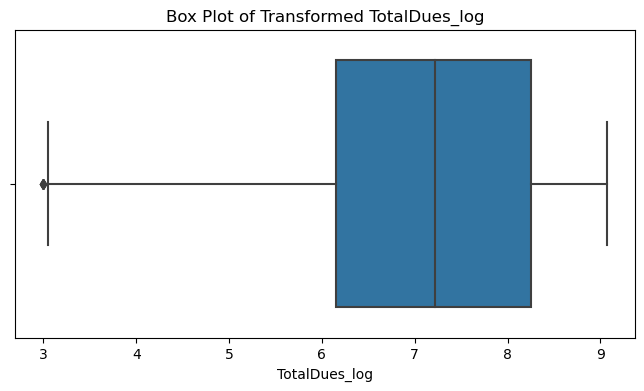

In [25]:
# Apply log transformation to the numerical features with outliers
df_test['MonthsInUnion_log'] = np.log1p(df_test['MonthsInUnion'])
df_test['MonthlyDues_log'] = np.log1p(df_test['MonthlyDues'])
df_test['TotalDues_log'] = np.log1p(df_test['TotalDues'])

# Visualize the transformed features to check the effect of the transformationb
for feature in ['MonthsInUnion_log', 'MonthlyDues_log', 'TotalDues_log']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_test[feature])
    plt.title(f'Box Plot of Transformed {feature}')
    plt.show()

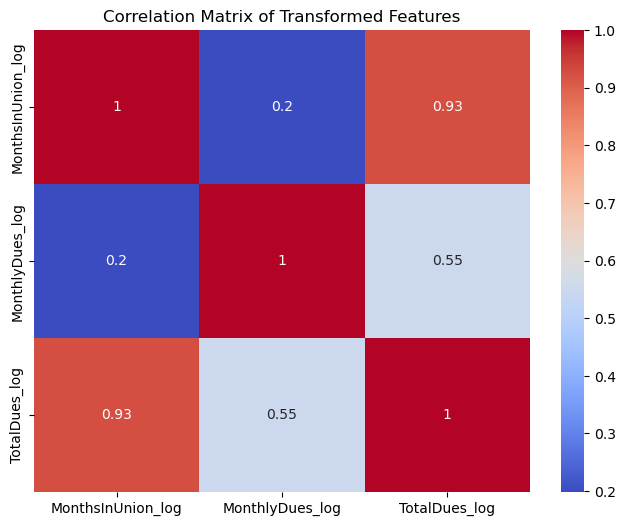

In [26]:
# Calculate the correlation matrix for the transformed numerical features
correlation_matrix = df_test[['MonthsInUnion_log', 'MonthlyDues_log', 'TotalDues_log']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Transformed Features')
plt.show()

In [27]:
# One-Hot Encode categorical variables
df_test_encoded = pd.get_dummies(df_test, columns=[
    'gender', 'USAcitizen', 'Married', 'ContinuingEd', 
    'FeatureA', 'Connectivity', 'FeatureC', 'FeatureD', 
    'FeatureE', 'FeatureF', 'FeatureG', 'FeatureB', 
    'DuesFrequency', 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

# Drop irrelevant columns and the original untransformed features
df_test_final = df_test_encoded.drop(columns=['ID', 'MonthsInUnion', 'MonthlyDues', 'TotalDues'])


# Display the first few rows of the final dataset to verify
df_test_final.head()

,Management,MonthsInUnion_log,MonthlyDues_log,TotalDues_log,gender_Male,USAcitizen_Yes,Married_Yes,ContinuingEd_Yes,FeatureA_No,FeatureA_Yes,...,FeatureG_No,FeatureG_Yes,FeatureB_No,FeatureB_Yes,DuesFrequency_One year,DuesFrequency_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,4.077537,4.663439,8.735686,1,0,0,1,0,1,...,0,1,0,1,1,0,1,0,1,0
1,0,3.850148,3.044522,6.792344,0,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1.098612,3.044522,3.583519,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,3.135494,2.995732,6.120297,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4.077537,4.343805,8.393216,0,1,1,1,0,1,...,0,1,1,0,0,1,0,0,0,1


## Testing the Models with Unseen Data
### Part 2: Predicting with Each Model

In [31]:
# Example for Logistic Regression model
X_test_set = df_test_final

# Predict using Logistic Regression
y_pred_lr = lr_model.predict(X_test_set)

# Similarly, predict with other models
y_pred_dt = dt_model.predict(X_test_set)
y_pred_rf = rf_model.predict(X_test_set)
y_pred_svm = svm_model.predict(X_test_set)
y_pred_bdt = best_dt_model.predict(X_test_set)

# Assuming your test data (X_test) is preprocessed and ready for prediction

# Convert the test data to a PyTorch tensor
X_test_tensor = torch.tensor(X_test_set.values, dtype=torch.float32)

# Put the model in evaluation mode
model.eval()

# Make predictions on the test data
with torch.no_grad():  # Disables gradient computation for inference
    y_pred_nn = model(X_test_tensor).numpy()

# Convert the predictions to binary class labels
y_pred_nn_classes = (y_pred_nn > 0.5).astype(int)  # Assuming a threshold of 0.5

# You can now use these predictions as needed, for example:
#print(y_pred_nn_classes)
#print(df_test_final.head())
#print(tuple(zip(y_pred_svm,y_pred_rf,y_pred_nn_classes)))

In [42]:
# Add the predictions to the test DataFrame
df_test_final['Predicted_leftunion_lr'] = y_pred_lr  # or y_pred_dt, y_pred_rf, etc.
df_test_final['Predicted_leftunion_rf'] = y_pred_rf
df_test_final['Predicted_leftunion_nn'] = y_pred_nn_classes
df_test_final['Predicted_leftunion_dt'] = y_pred_dt
df_test_final['Predicted_leftunion_bdt'] = y_pred_bdt
# Display or save the predictions
df_test_final.head(5)
df_test_final.to_excel('Alicia_TEST_predictions.xlsx', index=False)

## Visualizing the Results
### Do the Models Coincide?

In [43]:

# Model accuracies
accuracies = [accuracy_lr, accuracy_rf, accuracy_nn, accuracy_dt, accuracy_best_dt]

# List of prediction columns in the same order as accuracies
prediction_columns = [
    'Predicted_leftunion_lr', 
    'Predicted_leftunion_rf', 
    'Predicted_leftunion_nn', 
    'Predicted_leftunion_dt', 
    'Predicted_leftunion_bdt'
]

# Create new columns to store calculated probabilities
df['Probability_Leave'] = 0.0
df['Probability_Stay'] = 0.0

# Loop through each row in the DataFrame
for index, row in df_test_final.iterrows():
    # Calculate the weighted sum of predictions for leaving
    weighted_sum_leave = sum([accuracy * row[pred_col] for accuracy, pred_col in zip(accuracies, prediction_columns)])
    
    # Total weight (sum of accuracies)
    total_weights = sum(accuracies)
    
    # Calculate probabilities
    probability_leave = weighted_sum_leave / total_weights
    probability_stay = 1 - probability_leave
    
    # Store the results back in the DataFrame
    df_test_final.at[index, 'Probability_Leave'] = probability_leave
    df_test_final.at[index, 'Probability_Stay'] = probability_stay

# Display the updated DataFrame
print(df_test_final[['Probability_Leave', 'Probability_Stay']].head(35))

    Probability_Leave  Probability_Stay
0            0.183673          0.816327
1            0.000000          1.000000
2            0.000000          1.000000
3            0.000000          1.000000
4            0.000000          1.000000
5            0.000000          1.000000
6            0.000000          1.000000
7            0.000000          1.000000
8            0.000000          1.000000
9            0.000000          1.000000
10           0.000000          1.000000
11           0.000000          1.000000
12           0.000000          1.000000
13           0.000000          1.000000
14           0.000000          1.000000
15           0.202806          0.797194
16           0.797194          0.202806
17           0.183673          0.816327
18           0.794643          0.205357
19           0.000000          1.000000
20           1.000000          0.000000
21           1.000000          0.000000
22           0.183673          0.816327
23           0.613520          0.386480


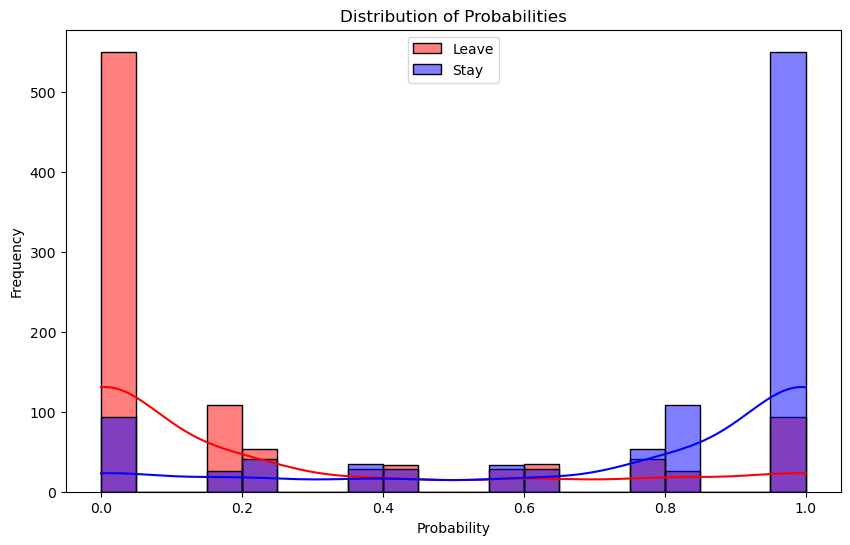

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df_test_final['Probability_Leave'], bins=20, kde=True, color='red', label='Leave')
sns.histplot(df_test_final['Probability_Stay'], bins=20, kde=True, color='blue', label='Stay')
plt.title('Distribution of Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

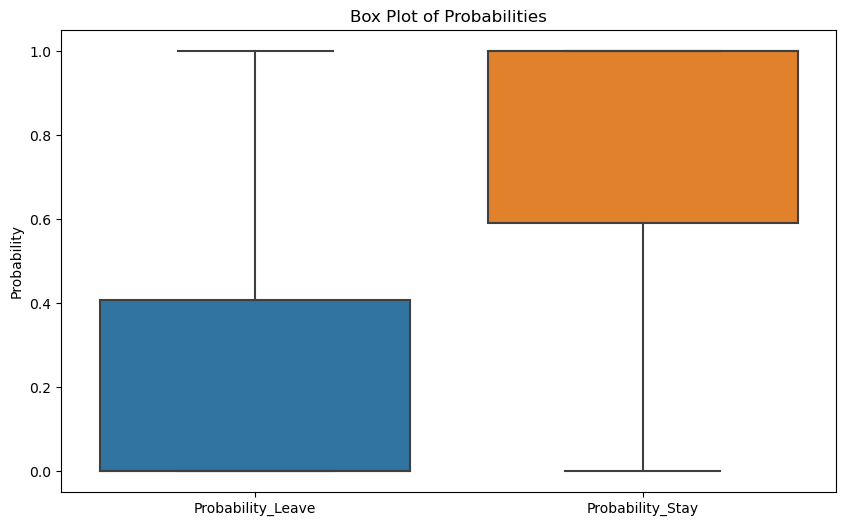

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_test_final[['Probability_Leave', 'Probability_Stay']])
plt.title('Box Plot of Probabilities')
plt.ylabel('Probability')
plt.show()

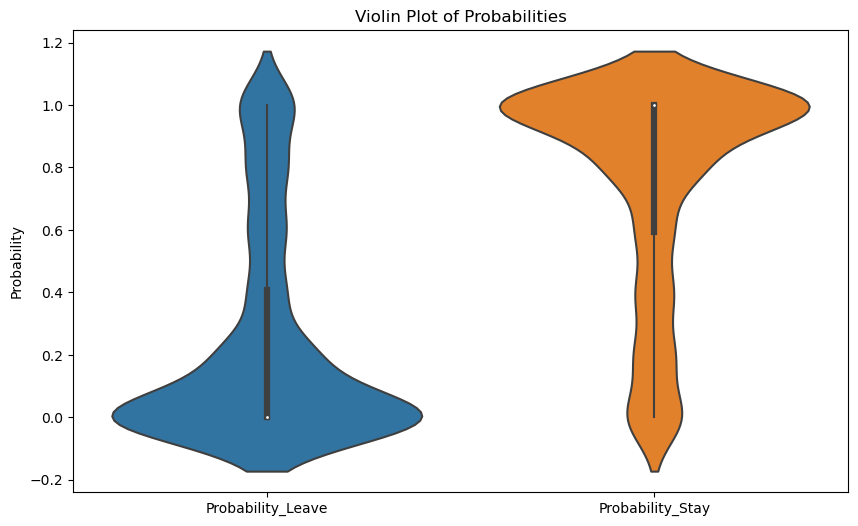

In [46]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_test_final[['Probability_Leave', 'Probability_Stay']], split=True)
plt.title('Violin Plot of Probabilities')
plt.ylabel('Probability')
plt.show()

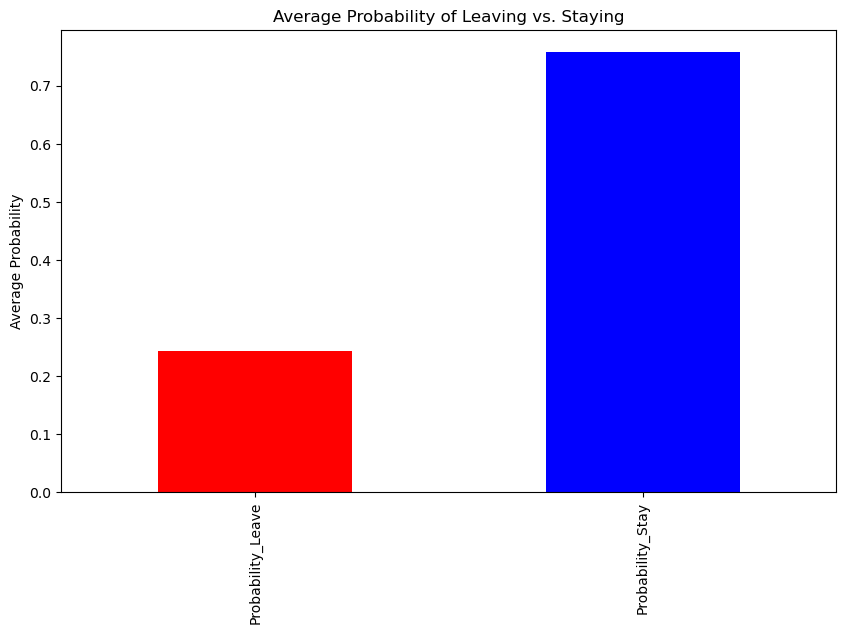

In [47]:
plt.figure(figsize=(10, 6))
df_test_final[['Probability_Leave', 'Probability_Stay']].mean().plot(kind='bar', color=['red', 'blue'])
plt.title('Average Probability of Leaving vs. Staying')
plt.ylabel('Average Probability')
plt.show()

#### Based on the below violin plot, we can see that gender does not have a significant effect on a member's continued status.

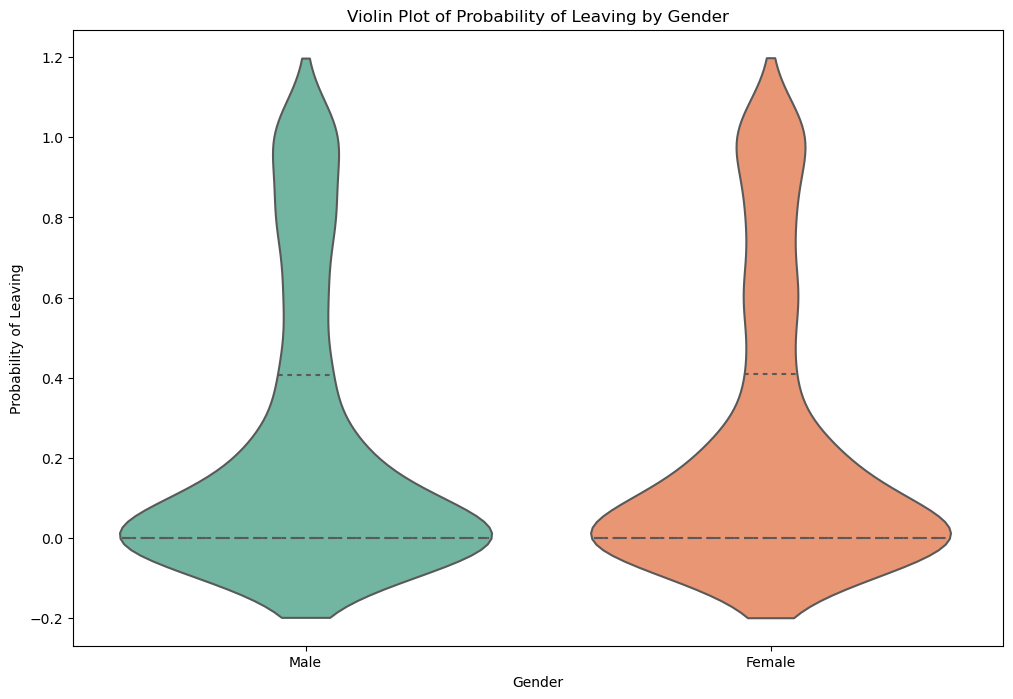

In [48]:
# Assuming 'gender_Male' is the column representing gender in the dataset
# We will create a new column for gender labels for easier interpretation
df_test_final['Gender'] = df_test_final['gender_Male'].apply(lambda x: 'Male' if x == 1 else 'Female')

# Plot the violin plot with gender distribution
plt.figure(figsize=(12, 8))
sns.violinplot(x='Gender', y='Probability_Leave', data=df_test_final, split=True, inner="quart", palette="Set2")
plt.title('Violin Plot of Probability of Leaving by Gender')
plt.ylabel('Probability of Leaving')
plt.xlabel('Gender')
plt.show()

### Feature Importance Plot (for Tree-Based Models)
#### Purpose: Shows the importance of each feature in predicting whether a member will stay or leave. 

- Each bar represents the importance of a feature. 
- Higher bars indicate more influential features.

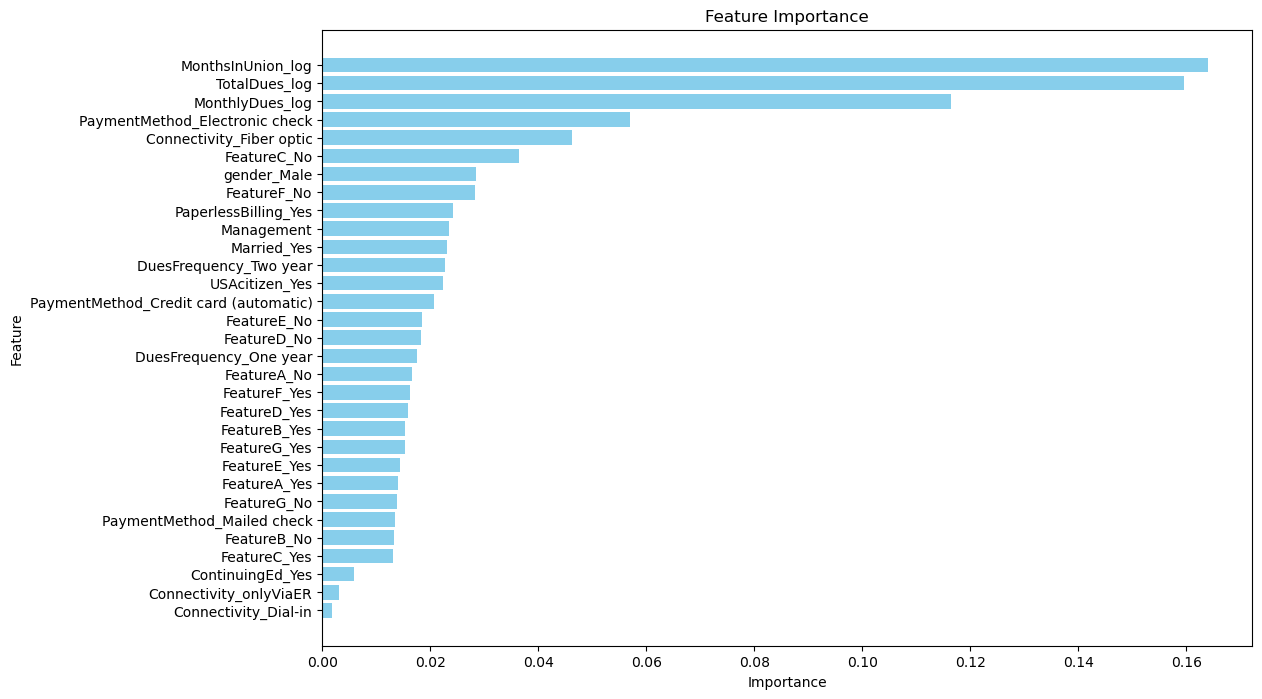

In [49]:
# Assuming rf_model is your trained Random Forest model
# and X_train is the DataFrame containing your features

# Get feature importances from the model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easier plotting
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

### Coefficient Plot (for Linear Models)
#### Purpose: Shows the weight (coefficient) of each feature in the model. 
- Positive coefficients push the prediction towards 1 (leaving), while 
- negative coefficients push towards 0 (staying).
- Each bar represents a coefficient. Features with higher absolute values have a greater influence.

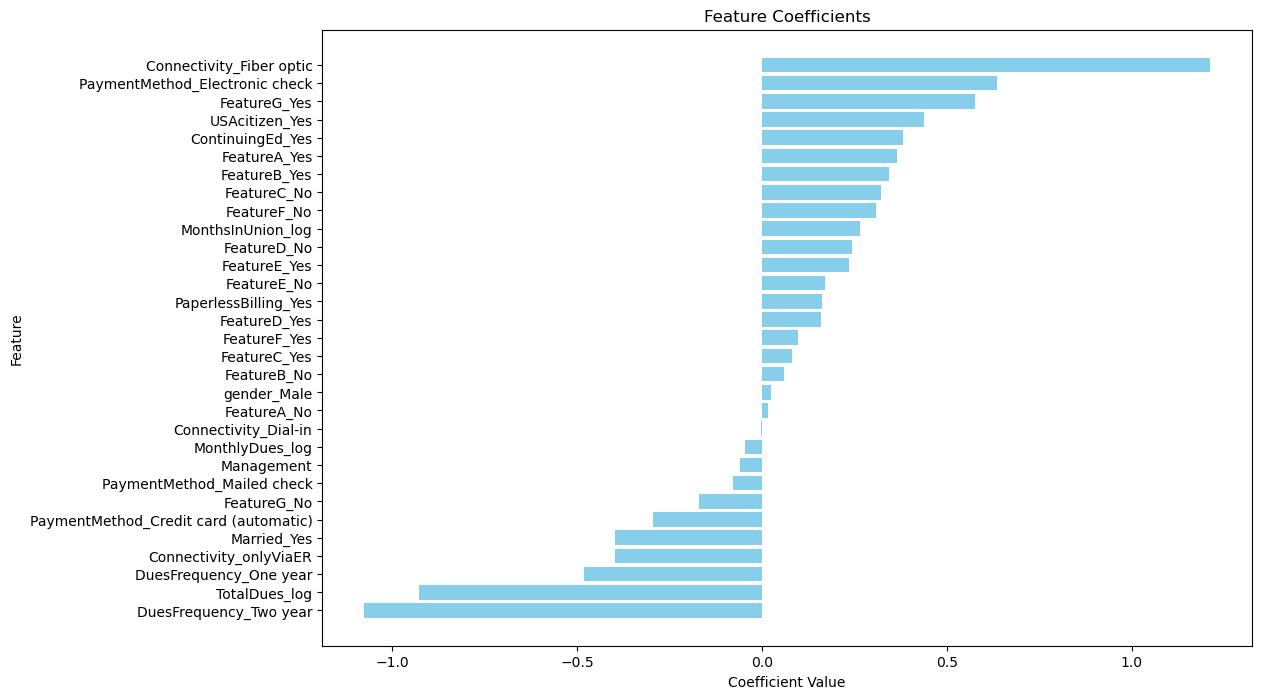

In [50]:
# Assuming lr_model is your trained Logistic Regression model
# and X_train is the DataFrame containing your features

# Get coefficients from the model
coefficients = lr_model.coef_[0]
feature_names = X_train.columns

# Create a DataFrame for easier plotting
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(12, 8))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the most influential feature at the top
plt.show()

- We can see by the Feature Coefficients that Fiber Optic members are most likely to jump ship!
- And Two Year Frequency for Due payment is a feature that indicates a higher likelyhood of staying in the union.

In [57]:
# Copy Original Dataframe
df_copy = df.copy()

# Select the prediction columns from df_test_final
predictions_df = df_test_final[prediction_columns]

# Concatenate the original df_copy with the prediction columns
df_combined = pd.concat([df_copy, predictions_df], axis=1)

# Now df_combined contains all the original data from df plus the prediction columns

df_combined.to_excel('Alicia_TEST_cleaned_predictions.xlsx', index=False)

# You can now view the cleaned results in the .xlsx doc generated above